# Importing the necessary packages

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Reading the train dataset, test dataset

In [111]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [112]:
print("Head of train...")
train.head(2)

Head of train...


,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1


In [113]:
print("Head of test...")
test.head(2)

Head of test...


,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38


So the first column in the train and test dataset are the ids. We are going to drop the ids column from the train dataset and stores the ids in a different dataframe for prediction purposes later on

In [114]:
train = train.drop(['Unnamed: 0'], axis = 1)
test_ids = test['Unnamed: 0']
test = test.drop(['Unnamed: 0'], axis = 1)

In [115]:
print ("The shape of the train dataset is " + str(train.shape))
print ("The shape of the test dataset is " + str(test.shape))

The shape of the train dataset is (576, 5)
The shape of the test dataset is (200, 4)


In [116]:
target = train['Made Donation in March 2007']
target.value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

We have stored the target variable of train dataset into a seperate dataframe. So we are going to drop the target variable from the train dataset

In [117]:
train = train.drop(['Made Donation in March 2007'], axis = 1)

In [118]:
train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347
std,8.175454,5.740010,1435.002556,24.227672
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,49.250000
max,74.000000,50.000000,12500.000000,98.000000


We are going to merge train and test dataset to prevent multiple operations on them

In [119]:
df = train.append(test, ignore_index = True)

# Visualizing the variables to understand the dataset a bit more

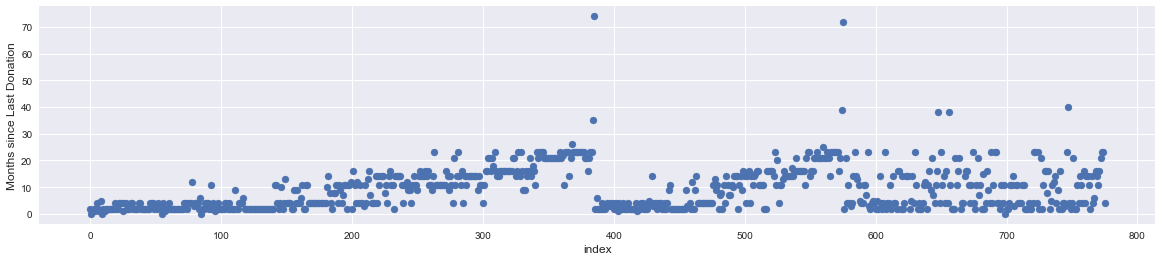

In [120]:
plt.figure(figsize=(20,4))
plt.scatter(range(df.shape[0]), df['Months since Last Donation'].values)
plt.xlabel('index', fontsize=12)
plt.ylabel('Months since Last Donation', fontsize=12)
plt.show()

There are outliers in the months since last donation. We are going to treat those outliers and assign those outliers the maximum value of the variable

In [121]:
ulimit_df = np.percentile(df['Months since Last Donation'].values, 99.5)
df['Months since Last Donation'].ix[df['Months since Last Donation'].values>ulimit_df] = ulimit_df

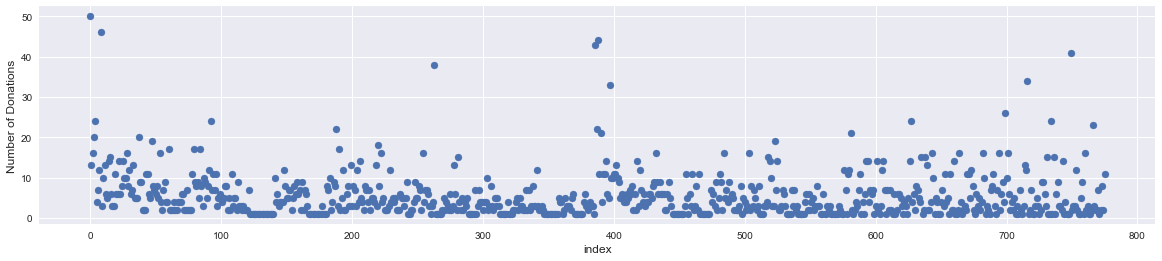

In [122]:
plt.figure(figsize=(20,4))
plt.scatter(range(df.shape[0]), df['Number of Donations'].values)
plt.xlabel('index', fontsize=12)
plt.ylabel('Number of Donations', fontsize=12)
plt.show()

We are going to treat the outliers in the same way we did with the variable Months since last donation

In [123]:
ulimit_df = np.percentile(df['Number of Donations'].values, 99.5)
df['Number of Donations'].ix[df['Number of Donations'].values>ulimit_df] = ulimit_df

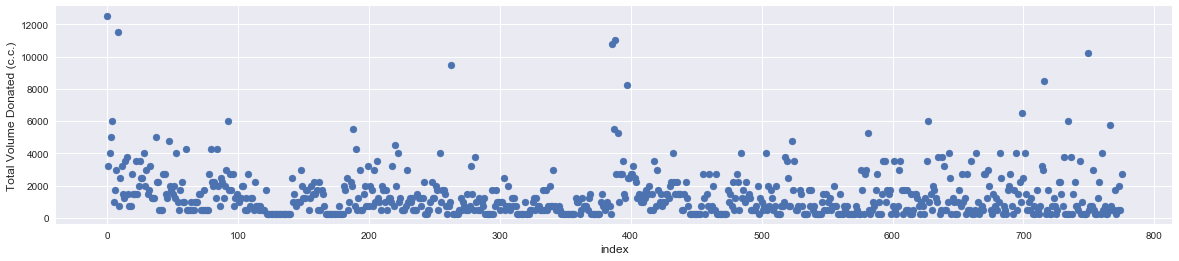

In [124]:
plt.figure(figsize=(20,4))
plt.scatter(range(df.shape[0]), df['Total Volume Donated (c.c.)'].values)
plt.xlabel('index', fontsize=12)
plt.ylabel('Total Volume Donated (c.c.)', fontsize=12)
plt.show()

We are going to treat the outliers in the same way

In [125]:
ulimit_df = np.percentile(df['Total Volume Donated (c.c.)'].values, 99.5)
df['Total Volume Donated (c.c.)'].ix[df['Total Volume Donated (c.c.)'].values>ulimit_df] = ulimit_df

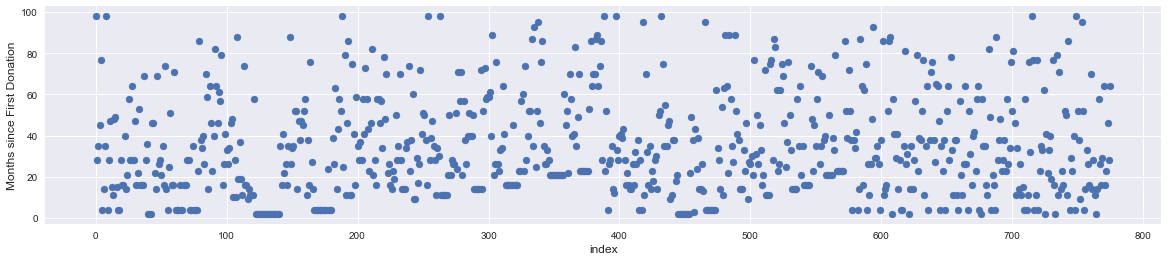

In [126]:
plt.figure(figsize=(20,4))
plt.scatter(range(df.shape[0]), df['Months since First Donation'].values)
plt.xlabel('index', fontsize=12)
plt.ylabel('Months since First Donation', fontsize=12)
plt.show()

There are no outliers in the variable Months since first donation

We will try some feature engineering on the above dataset. We will create some new features
1. Number of months of donation for which the volunteer has been donating
2. Number of months per donation
3. Volume donated/month
4. Volume donated/donation

We are going to drop the variable Months since first donation since it is intuitively not going to impact the outcome. Similarly we are going to drop Total volume donated as the information for this variable has been captured in volume donated/month and volume donated/donation

In [128]:
#df['Number of months of donation'] = df['Months since First Donation'] - df['Months since Last Donation']
df['Number of months per donation'] = (df['Months since First Donation']-df['Months since Last Donation'])/df['Number of Donations']
df['Number of months per donation'].loc[np.isinf(df['Number of months per donation'])] = 0
df['Volume donated/month'] = df['Total Volume Donated (c.c.)']/(df['Months since First Donation']-df['Months since Last Donation'])
df['Volume donated/month'].loc[np.isinf(df['Volume donated/month'])] = 0
df['Volume donated/donation'] = df['Total Volume Donated (c.c.)']/df['Number of Donations']
df['Volume donated/donation'].loc[np.isinf(df['Volume donated/donation'])] = 0
df = df.drop(['Months since First Donation','Total Volume Donated (c.c.)'], axis = 1)

In [129]:
df.head(2)

,Months since Last Donation,Number of Donations,Number of months per donation,Volume donated/month,Volume donated/donation
0,2.0,41.25,2.327273,107.421875,250.0
1,0.0,13.00,2.153846,116.071429,250.0


I have a hunch that volume donated per donation might have the same value. Lets check it out

In [130]:
df['Volume donated/donation'].value_counts()

250.0    776
Name: Volume donated/donation, dtype: int64

So we will have to drop the variable volume donated/donation and along with it volume donated/month because if the donation amount remains same then volume donated/month is just an extension of variable of number of donation per month

In [131]:
df = df.drop(['Volume donated/month','Volume donated/donation'], axis = 1)

In [132]:
df.head(2)

,Months since Last Donation,Number of Donations,Number of months per donation
0,2.0,41.25,2.327273
1,0.0,13.00,2.153846


In [133]:
df.describe()

,Months since Last Donation,Number of Donations,Number of months per donation
count,776.00000,776.000000,776.000000
mean,9.36018,5.534794,4.444235
std,7.48171,5.685784,5.015384
min,0.00000,1.000000,0.000000
25%,3.00000,2.000000,0.583333
50%,7.00000,4.000000,3.500000
75%,14.00000,7.000000,6.000000
max,38.12500,41.250000,35.875000


In [134]:
train = df.iloc[:576,:]

In [135]:
train_target = train.join(target)

In [136]:
train_target.head(1)

,Months since Last Donation,Number of Donations,Number of months per donation,Made Donation in March 2007
0,2.0,41.25,2.327273,1


# We are going to plot the scatterplots between the variables and the targets and try to see if there is a clear distinguishing feature 

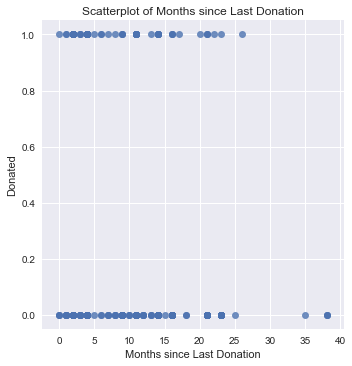

In [137]:
plt.figure(figsize=(15,5))
sns.lmplot('Months since Last Donation', 'Made Donation in March 2007',data = train_target, fit_reg=False)
plt.title('Scatterplot of Months since Last Donation')
plt.xlabel('Months since Last Donation')
plt.ylabel('Donated')

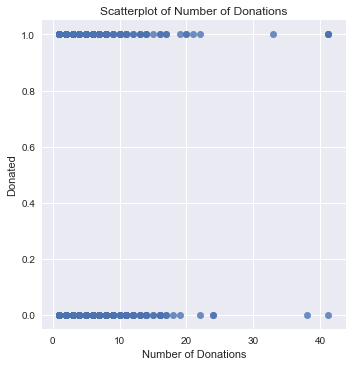

In [138]:
plt.figure(figsize=(15,5))
sns.lmplot('Number of Donations', 'Made Donation in March 2007',data = train_target, fit_reg=False)
plt.title('Scatterplot of Number of Donations')
plt.xlabel('Number of Donations')
plt.ylabel('Donated')

In [139]:
#plt.figure(figsize=(15,5))
#sns.lmplot('Number of months of donation', 'Made Donation in March 2007',data = train_target, fit_reg=False)
#plt.title('Scatterplot of Number of months of donation')
#plt.xlabel('Number of months of donation')
#plt.ylabel('Donated')

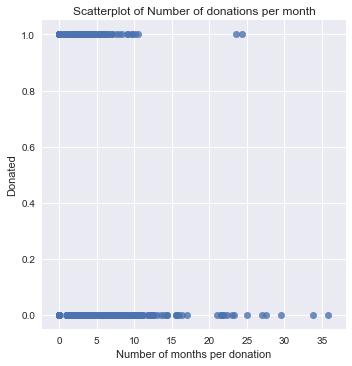

In [140]:
plt.figure(figsize=(15,5))
sns.lmplot('Number of months per donation', 'Made Donation in March 2007',data = train_target, fit_reg=False)
plt.title('Scatterplot of Number of donations per month')
plt.xlabel('Number of months per donation')
plt.ylabel('Donated')

Could not derive much insight from scatterplots 

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score

In [142]:
classifiers = [LogisticRegression(),
               KNeighborsClassifier(n_neighbors = 3),
               GaussianNB(),
               RandomForestClassifier(n_estimators=1000, random_state = 8)]

In [143]:
for clf in classifiers:
    name = clf.__class__.__name__
    Accuracy = cross_val_score(clf, train, np.ravel(target), scoring = 'accuracy',cv=5).mean()
    LogLoss = cross_val_score(clf, train, np.ravel(target), scoring = 'neg_log_loss',cv=5).mean()
    ROC_AUC = cross_val_score(clf, train, np.ravel(target), scoring = 'roc_auc',cv=5).mean()
    
    print("="*30)
    print(name)
    
    print('****Results****')
    print("Accuracy: {}".format(Accuracy))
    print("LogLoss: {}".format(LogLoss))
    print("ROC_AUC: {}".format(ROC_AUC * 100))
    
print("="*30)

LogisticRegression
****Results****
Accuracy: 0.7743194192377495
LogLoss: -0.5302806860685482
ROC_AUC: 85.10645763878522
KNeighborsClassifier
****Results****
Accuracy: 0.6310042347247429
LogLoss: -6.717820823375701
ROC_AUC: 50.94119561791975
GaussianNB
****Results****
Accuracy: 0.7553236539624925
LogLoss: -0.6870505310936454
ROC_AUC: 81.64076969752256
RandomForestClassifier
****Results****
Accuracy: 0.6791591046581973
LogLoss: -1.0115024390323009
ROC_AUC: 54.23451987029573


In [144]:
test = df.iloc[576:,:]

In [146]:
from sklearn.grid_search import GridSearchCV

In [147]:
params = {'C':[1, 500, 1000, 2000, 3000], 'tol': [ 0.001, 0.0005, 0.0002, 0.0001]}
model = LogisticRegression()
clf = GridSearchCV(model, params, scoring='log_loss', refit='True', n_jobs=1, cv=5)
clf.fit(train,np.ravel(target))

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 500, 1000, 2000, 3000], 'tol': [0.001, 0.0005, 0.0002, 0.0001]},
       pre_dispatch='2*n_jobs', refit='True', scoring='log_loss',
       verbose=0)

In [148]:
clf.grid_scores_, clf.best_params_, clf.best_score_

([mean: -0.53011, std: 0.08975, params: {'C': 1, 'tol': 0.001},
  mean: -0.53011, std: 0.08975, params: {'C': 1, 'tol': 0.0005},
  mean: -0.53012, std: 0.08976, params: {'C': 1, 'tol': 0.0002},
  mean: -0.53014, std: 0.08974, params: {'C': 1, 'tol': 0.0001},
  mean: -0.53135, std: 0.08919, params: {'C': 500, 'tol': 0.001},
  mean: -0.53135, std: 0.08918, params: {'C': 500, 'tol': 0.0005},
  mean: -0.53135, std: 0.08920, params: {'C': 500, 'tol': 0.0002},
  mean: -0.53139, std: 0.08917, params: {'C': 500, 'tol': 0.0001},
  mean: -0.53135, std: 0.08919, params: {'C': 1000, 'tol': 0.001},
  mean: -0.53135, std: 0.08918, params: {'C': 1000, 'tol': 0.0005},
  mean: -0.53135, std: 0.08920, params: {'C': 1000, 'tol': 0.0002},
  mean: -0.53139, std: 0.08917, params: {'C': 1000, 'tol': 0.0001},
  mean: -0.53135, std: 0.08919, params: {'C': 2000, 'tol': 0.001},
  mean: -0.53135, std: 0.08918, params: {'C': 2000, 'tol': 0.0005},
  mean: -0.53135, std: 0.08920, params: {'C': 2000, 'tol': 0.0002},


In [149]:
test_predictions = clf.predict(test)

In [150]:
count = np.bincount(test_predictions)
classes = np.nonzero(count)[0]
np.vstack((classes,count[classes])).T

array([[  0, 186],
       [  1,  14]], dtype=int64)

In the train dataset the number of 1s in the target variable was 138 and the number of 0s was 438. Thus the ratio of 0s/1s was 3.17.But our prediction is giving a ratio of 13.  
# We will have to modify the probability threshold. Even though we will have to make the final prediction as probabilities but we will play around with the probability threshold just to see how it works

In [151]:
test_predictions_proba = clf.predict_proba(test)[:,1]

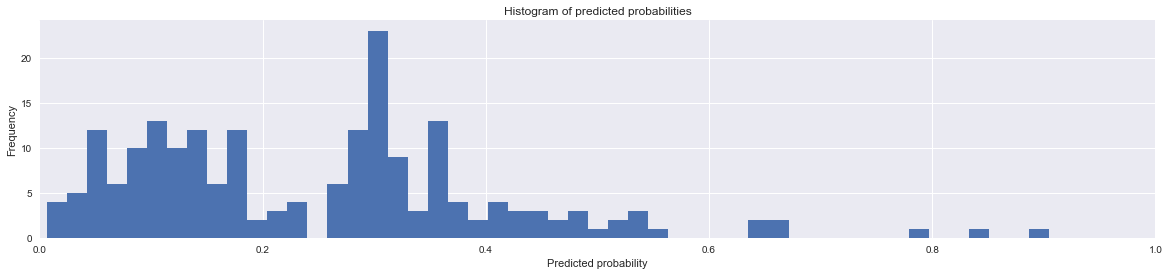

In [152]:
# Let us plot the histogram of predicted probabilities
plt.figure(figsize=(20,4))
plt.hist(test_predictions_proba, bins=50)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

In [153]:
# we are going to set the probability threshold as 0.3
from sklearn.preprocessing import binarize
test_predictions = binarize([test_predictions_proba], 0.3)[0]
test_predictions

array([ 1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,
        0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0

In [154]:
count = np.bincount(test_predictions.astype('I'))
classes = np.nonzero(count)[0]
np.vstack((classes,count[classes])).T

array([[  0, 118],
       [  1,  82]], dtype=int64)

The ratio of 0s/1s is 2.5

In [155]:
# Lets set the threshold of probability at 0.35 and see the ratio
test_predictions = binarize([test_predictions_proba], 0.35)[0]
count = np.bincount(test_predictions.astype('I'))
classes = np.nonzero(count)[0]
np.vstack((classes,count[classes])).T

array([[  0, 154],
       [  1,  46]], dtype=int64)

The ratio is now 4.26

In [156]:
# Lets plot a for loop to find the correct threshold from 0.3 to 0.35
for threshold in np.linspace(0.30, 0.35, 6):
    test_predictions = binarize([test_predictions_proba], threshold)[0]
    count = np.bincount(test_predictions.astype('I'))
    classes = np.nonzero(count)[0]
    print ("threshold of probability is " + str(threshold))
    print (np.vstack((classes,count[classes])).T)
    print ("Ratio of 0s/1s is " + str(np.vstack((classes,count[classes])).T[0,1]/np.vstack((classes,count[classes])).T[1,1]))

threshold of probability is 0.3
[[  0 118]
 [  1  82]]
Ratio of 0s/1s is 1.43902439024
threshold of probability is 0.31
[[  0 140]
 [  1  60]]
Ratio of 0s/1s is 2.33333333333
threshold of probability is 0.32
[[  0 143]
 [  1  57]]
Ratio of 0s/1s is 2.50877192982
threshold of probability is 0.33
[[  0 149]
 [  1  51]]
Ratio of 0s/1s is 2.92156862745
threshold of probability is 0.34
[[  0 151]
 [  1  49]]
Ratio of 0s/1s is 3.08163265306
threshold of probability is 0.35
[[  0 154]
 [  1  46]]
Ratio of 0s/1s is 3.34782608696


# Threshold of 0.34 is giving us a ratio close to 3.17

Preparing the submission file

In [157]:
submission = pd.DataFrame(test_predictions_proba, columns=['Made Donation in March 2007'])
submission.insert(0, 'Unnamed: 0', test_ids)
submission.reset_index()
submission.to_csv('submission.csv', index = False)